# WEB SCRAPING

In [1]:
import threading
import requests
import random
import time
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [2]:
immobiliare = requests.get("https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=1")
page = BeautifulSoup(immobiliare.text, "html5lib")
page

<!DOCTYPE html>
<!--[if IE 8]>
<html class="lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html lang="it" prefix=""><!--<![endif]--><head>
      <link href="https://css.im-cdn.it" rel="dns-prefetch"/>
    <link href="https://js.im-cdn.it" rel="dns-prefetch"/>
    <link href="https://img.im-cdn.it" rel="dns-prefetch"/>
    <!--[if lte IE 10]>
    <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Raleway:400,500&amp;subset=latin">
<![endif]-->
          <style>@charset "UTF-8";.container,.container-fluid{margin-right:auto;margin-left:auto}.container-fluid:after,.container-fluid:before,.container:after,.container:before,.row:after,.row:before{display:table;content:""}.btn-group-vertical>.btn,.btn-group>.btn,.btn-group>.btn-group,.btn-toolbar .btn,.btn-toolbar .btn-group,.btn-toolbar .input-group,.col-xs-0,.col-xs-1,.col-xs-10,.col-xs-11,.col-xs-12,.col-xs-2,.col-xs-3,.col-xs-4,.col-xs-5,.col-xs-6,.col-xs-7,.col-xs-8,.col-xs-9,.dropdown-menu,.nav-pills>li,.nav-tabs>li{float

In [3]:
n = page.find_all("span", class_ = "pagination__label")
n = n[len(n) - 1] #last element
n = int(n.getText())

In [4]:
links = []
notdw = []

In [5]:
def getLinksFromPage(url):
    time.sleep(round(random.uniform(0.01, 0.4), 2))
    try:
        immobiliare = requests.get(url)
    except:
        notdw.append(url)
        return
    result = BeautifulSoup(immobiliare.text, "html5lib")
    x = result.find_all("p", class_ = "titolo")
    
    links.extend([item.find('a').get('href') for item in x if item.find('a').get('href').startswith("https://www.immobiliare.it/")])


In [6]:
threads = []
    
for i in range(n): #n
    url = "https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=" + str(i + 1)
    t = threading.Thread(target=getLinksFromPage, args=(url,))
    threads.append(t)
    t.start()

In [7]:
def areThreadsAlive(threads):
    for thread in threads:
        if(thread.isAlive() == True):
            return "Not finished yet"
    
    return "All threads are completed"

In [8]:
notdw

['https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=39',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=21',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=137',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=147',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=78',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=134',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=37',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=148',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=105',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=190',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=50',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=175',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=163',
 'ht

In [13]:
len(notdw)

403

In [ ]:
areThreadsAlive(threads)

In [14]:
len(links)

32610

In [12]:
threads = []
tryagain = notdw.copy()
notdw = []
for url in tryagain:
    t = threading.Thread(target=getLinksFromPage, args=(url,))
    threads.append(t)
    t.start()

In [15]:
linkfile = open('data/links.txt', 'w')
for link in links:
    linkfile.write("%s\n" % link)
linkfile.close()

In [16]:
feautures = []
descr = []
notdw = []
def getDataFromLinks(i, url):
    time.sleep(round(random.uniform(0.01, 0.4), 2))
    # Get the webpage
    try:
        info = requests.get(url)
    except:
        notdw.append(url)
        return
    info = BeautifulSoup(info.text, "html5lib")
    
    # Get the feauters needed
    feauts = info.find_all("div", class_ = "im-property__features")
    feautList = [item.find_all("span") for item in feauts]  
    listfeautures = info.find("ul", class_ = "features__list")
    try:
        
        price = info.find_all("li", class_ = "features__price")[0].find('span', recursive=False).getText()
        
        room = None
        bathroom = None
        floor = None
        surface = None

        for elem in listfeautures.findAll('li'):
            if str(elem).find("locali") != -1:
                room = elem.find('span').getText()

            elif (str(elem).find("bagni") != -1):
                bathroom = elem.find('span').getText()

            elif (str(elem).find("piano") != -1):
                floor = elem.find('abbr').getText()

            elif (str(elem).find("superficie") != -1):
                surface =  elem.find('span').getText()

            if((room is not None) and\
               (bathroom is not None) and\
               (floor is not None) and\
               (surface is not None)):
            # Get the description 
                descr.extend([[url, info.find_all("div", class_ = "description-text")[0] \
                       .getText()\
                       .replace('\n', ' ')\
                       .replace('                                              ', '')\
                       .replace('                      ','')\
                      ]])
                feautures.extend([[url, price, room, surface, bathroom, floor]])

    except:
        return

In [17]:
threads = []

for i, url in enumerate(links):
    t = threading.Thread(target=getDataFromLinks, args=(i,url,))
    threads.append(t)
    t.start()

In [19]:
len(descr)

12435

In [20]:
len(notdw)

19734

In [ ]:
print(areThreadsAlive(threads))

In [21]:
dfFe = pd.DataFrame(feautures, columns = ["Url", "Price", "Room", "Surface", "Bathroom", "Floor"])
dfDe = pd.DataFrame(descr, columns = ["Url", "Descr"])

In [23]:
dfFe.head()

,Url,Price,Room,Surface,Bathroom,Floor
0,https://www.immobiliare.it/69032803-Vendita-Bi...,€ 169.000,2,72,1,T \n
1,https://www.immobiliare.it/69032803-Vendita-Bi...,€ 169.000,2,72,1,T \n
2,https://www.immobiliare.it/69783036-Vendita-At...,€ 520.000,4,120,3,A \n
3,https://www.immobiliare.it/69783036-Vendita-At...,€ 520.000,4,120,3,A \n
4,https://www.immobiliare.it/60154116-Vendita-Mo...,€ 195.000,1,38,1,1 \n


In [24]:
dfDe.head()

,Url,Descr
0,https://www.immobiliare.it/69032803-Vendita-Bi...,Rif: 1653461 - CENTOCELLE in Via Tor de Schiav...
1,https://www.immobiliare.it/69032803-Vendita-Bi...,Rif: 1653461 - CENTOCELLE in Via Tor de Schiav...
2,https://www.immobiliare.it/69783036-Vendita-At...,"Rif: VR/618 - Rifiutata proposta a €440,000 P..."
3,https://www.immobiliare.it/69783036-Vendita-At...,"Rif: VR/618 - Rifiutata proposta a €440,000 P..."
4,https://www.immobiliare.it/60154116-Vendita-Mo...,"Il progetto ""Loft San Lorenzo"" crea un connubi..."


In [ ]:
len(notdw)

In [ ]:
threads = []
todw = notdw.copy()
notdw = []

for i, url in enumerate(todw):
    t = threading.Thread(target=getDataFromLinks, args=(i,url,))
    threads.append(t)
    t.start()

In [ ]:
len(notdw)

In [ ]:
dfFe.head()

In [ ]:
dfFe.isnull().sum()

In [25]:
dfFe.to_csv('data/feautures.csv', sep=',', na_rep='')

In [26]:
dfDe.to_csv('data/descriptions.csv', sep=',', na_rep='')

In [3]:
dfDe = pd.read_csv('data/descriptions.csv', index_col = 0)
dfFe = pd.read_csv('data/feautures.csv', index_col = 0)

In [28]:
dfFe = dfFe[dfFe.Bathroom != 'al mese']

In [29]:
dfFe.head(5)

,Url,Price,Room,Surface,Bathroom,Floor
0,https://www.immobiliare.it/69032803-Vendita-Bi...,€ 169.000,2,72.0,1,T \n
1,https://www.immobiliare.it/69032803-Vendita-Bi...,€ 169.000,2,72.0,1,T \n
2,https://www.immobiliare.it/69783036-Vendita-At...,€ 520.000,4,120.0,3,A \n
3,https://www.immobiliare.it/69783036-Vendita-At...,€ 520.000,4,120.0,3,A \n
4,https://www.immobiliare.it/60154116-Vendita-Mo...,€ 195.000,1,38.0,1,1 \n


In [30]:
set(dfFe['Floor'])

{'10\xa0    \n',
 '11+\xa0    \n',
 '1\xa0    \n',
 '2\xa0    \n',
 '3\xa0    \n',
 '4\xa0    \n',
 '5\xa0    \n',
 '6\xa0    \n',
 '7\xa0    \n',
 '8\xa0    \n',
 '9\xa0    \n',
 'A\xa0    \n',
 'R\xa0    \n',
 'S\xa0    \n',
 'T\xa0    \n'}

In [31]:
set(dfFe['Surface'])

{1.0,
 1.1,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.6,
 2.74,
 7.0,
 8.0,
 9.0,
 10.0,
 14.0,
 15.0,
 16.0,
 18.0,
 20.0,
 21.0,
 22.0,
 25.0,
 26.0,
 27.0,
 28.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139.0,
 140.0,
 141.0,
 142.0,
 14

In [32]:
dfFe.groupby(['Bathroom']).count()

,Url,Price,Room,Surface,Floor
Bathroom,,,,,
1,6644,6644,6644,6644,6644
2,4573,4573,4573,4573,4573
3+,286,286,286,286,286
3,921,921,921,921,921
4,11,11,11,11,11


In [35]:
pd.options.mode.chained_assignment = None  # default='warn'
dfFe = dfFe.replace(r'\  \n',' ', regex=True).replace(r'\xa0', '').replace(r'\s+', '', regex=True)
dfFe.Price =  pd.to_numeric(dfFe.Price\
                            .replace('€ ', '')\
                            .replace("[^0-9]", '', regex = True))

#All ads with more than 5 rooms, now will become 6 instead of 5+
dfFe.Room =   pd.to_numeric(dfFe.Room.replace('5\+', '6').replace("[^0-9]", '', regex = True)) 

#All ads with more than 3 bathroome, now will become 4 instead of 3+
dfFe.Bathroom =  pd.to_numeric(dfFe.Bathroom.replace('3\+', '4').replace("[^0-9]", '', regex = True))

dfFe.Surface =  pd.to_numeric(dfFe.Surface.replace("[^0-9]", '', regex = True))
dfFe.Floor =  pd.to_numeric(dfFe.Floor.replace('11+', '12')
                            .replace('A', '-1')\
                            .replace('R', '-2')\
                            .replace('S', '-3')\
                            .replace('T', '-4'))

#  'A\xa0    \n',
#  'R\xa0    \n',
#  'S\xa0    \n',
#  'T\xa0    \n'}

In [36]:

dfFe.head()

,Url,Price,Room,Surface,Bathroom,Floor
0,https://www.immobiliare.it/69032803-Vendita-Bi...,169000.0,2,72.0,1,-4
1,https://www.immobiliare.it/69032803-Vendita-Bi...,169000.0,2,72.0,1,-4
2,https://www.immobiliare.it/69783036-Vendita-At...,520000.0,4,120.0,3,-1
3,https://www.immobiliare.it/69783036-Vendita-At...,520000.0,4,120.0,3,-1
4,https://www.immobiliare.it/60154116-Vendita-Mo...,195000.0,1,38.0,1,1


There's one house that has the value of 650000000 euros. We belive this is a mistake, so we will proceed to remove it since it messes up with the clustering.

In [37]:
dfFe.loc[(dfFe['Price'] > 10000000)]

,Url,Price,Room,Surface,Bathroom,Floor


We want to consider 10000000 euros an improbable amount for a house in Rome. 
As we can see, in our list just 3 houses have a price that is set over that amount:
- https://www.immobiliare.it/65441890-immobili_commerciali-magazzino-in-vendita-Roma.html,11500000.0,6,15695,4,1
- https://www.immobiliare.it/69369480-Vendita-Appartamento-via-Ambrogio-Traversari-Roma.html
- https://www.immobiliare.it/66708185-Vendita-Appartamento-via-Pietro-Mascagni-158-Roma.html

The first one was a magazine, and it is not available anymore, so probably Immobiliare removed it already.
The second one is an apartment where the owner set a price of 650000000 euro, clearly a mistake since the apartment is not worth that amount (probably there should be 3 zeros less).
The last one has a pricetag of 11111111 and looking at the ad we can read that the owner is open to discuss a price, so set just one randomly for the website (since it is a required value).

We want just to remove these values, to have a better clustering.

In [38]:
dfFe = dfFe.loc[(dfFe['Price'] < 10000000)]
dfFe.isnull().sum()

Url         0
Price       0
Room        0
Surface     0
Bathroom    0
Floor       0
dtype: int64

In [39]:
dfFe.loc[(dfFe['Price'] > 10000000)]

,Url,Price,Room,Surface,Bathroom,Floor


In [40]:
dfFe.to_csv('data/feauturesCleaned.csv', sep=',', na_rep='')

dfFe = pd.read_csv('data/feauturesCleaned.csv', sep=',', index_col=0)
dfFe.head()

,Url,Price,Room,Surface,Bathroom,Floor
0,https://www.immobiliare.it/69032803-Vendita-Bi...,169000.0,2,72.0,1,-4
1,https://www.immobiliare.it/69032803-Vendita-Bi...,169000.0,2,72.0,1,-4
2,https://www.immobiliare.it/69783036-Vendita-At...,520000.0,4,120.0,3,-1
3,https://www.immobiliare.it/69783036-Vendita-At...,520000.0,4,120.0,3,-1
4,https://www.immobiliare.it/60154116-Vendita-Mo...,195000.0,1,38.0,1,1


In [68]:
descr = list(dfDe['Descr'])

In [77]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import string
from nltk.tokenize import RegexpTokenizer
#download the stop words
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fabiomontello/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
nltk.download("stopwords")
stopwords = stopwords.words('italian')
st = nltk.stem.SnowballStemmer("italian")
def clean(doc):
    tokenizer = RegexpTokenizer(r'\w+')
    doc = tokenizer.tokenize(doc) #tokenize the query for stop word and punctuation
    doc = [t for t in doc if t not in stopwords and t.isalpha()] #remove stopword
    doc = [st.stem(word) for word in doc] #stemming
    
    return doc



#tostem = ([x.lower() for x in text.split(' ') if x.lower() not in stopwords.words(languages[lan]) and x.isalpha()])
#docdict[i] = [nltk.stem.SnowballStemmer(languages[lan]).stem(word) for word in tostem]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fabiomontello/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
aa = []
for i in descr:
    aa += [clean(i)]

In [80]:
cc = set([i for item in aa for i in item])
cc

{'folclorisct',
 'whol',
 'adda',
 'gsm',
 'ruggin',
 'resistt',
 'caratt',
 'affittacam',
 'gioios',
 'palmarol',
 'playstor',
 'prosper',
 'calacatt',
 'confort',
 'veterinar',
 'galban',
 'redditiv',
 'cessazion',
 'torb',
 'enjoy',
 'balill',
 'stes',
 'stephan',
 'neoroman',
 'matricard',
 'sottopost',
 'tebalducc',
 'mas',
 'working',
 'estension',
 'sobr',
 'muy',
 'berter',
 'consapevolezz',
 'grecin',
 'assolatissim',
 'fiorerealest',
 'con',
 'sonnin',
 'scientif',
 'lav',
 'incass',
 'yacht',
 'anni',
 'flaviacas',
 'contattatac',
 'embed',
 'conobb',
 'fascist',
 'mascagn',
 'mr',
 'general',
 'divan',
 'key',
 'gravant',
 'gramsc',
 'centina',
 'millenar',
 'fornitissim',
 'prestazion',
 'mitell',
 'around',
 'rem',
 'detrazion',
 'mèr',
 'reciproc',
 'pret',
 'tomb',
 'grèss',
 'inconsuet',
 'indiscutibil',
 'gebäudes',
 'motoriduttor',
 'ranier',
 'orto',
 'arab',
 'sacc',
 'lauranton',
 'asserv',
 'portadirom',
 'tiz',
 'eurocas',
 'millesim',
 'niveau',
 'eurpe',
 'str

In [83]:
tfidf = pd.DataFrame(columns = list(cc))

In [92]:
import math
def tf_idf(word,doc,D,N):
    f = doc.count(word) / len(doc)
    tfidf = math.log(D/N)*f
    
    return float(tfidf)

In [85]:
id_descr = {i : d for i,d in enumerate(descr)}

In [86]:
adjacency = pd.DataFrame(0, index = id_descr.keys(), columns = list(cc), dtype= float)

In [87]:
for i, k in enumerate(aa):
    for j in cc:
        if j in k:
            adjacency.at[i,j] = 1

In [89]:
count_word = adjacency.sum()

In [91]:
D = len(adjacency.index)
for i, k in enumerate(aa):
    for j in cc:
        if adjacency.at[i,j] == 1:
            adjacency.at[i,j] = tf_idf(j, k, D, count_word[j])
            #print(tf_idf(j, k, D, count_word[j]))

In [94]:
adjacency.head()

,folclorisct,whol,adda,gsm,ruggin,resistt,caratt,affittacam,gioios,palmarol,...,abinvest,crafted,tabell,anzi,foa,uom,tre,tint,legg,sistemacasasanpaol
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [98]:
tokmean = dfFe.drop(['Url'], axis=1)
tokmean.isnull().sum()

Price       0
Room        0
Surface     0
Bathroom    0
Floor       0
dtype: int64

In [99]:
tokmean.loc[(tokmean['Price'] > 10000000)]

,Price,Room,Surface,Bathroom,Floor


In [100]:
tokmean = tokmean.dropna()
tokmean.isnull().sum()
len(tokmean)

12317

In [101]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(tokmean.values)
kmeans.labels_

array([0, 0, 2, ..., 2, 1, 0], dtype=int32)

In [102]:
kmeans.cluster_centers_

array([[2.28667710e+05, 2.83093401e+00, 8.23489001e+01, 1.30841875e+00,
        9.40803870e-01],
       [1.24882959e+06, 4.74809160e+00, 2.10063206e+02, 2.59236641e+00,
        1.61526718e+00],
       [5.84417310e+05, 4.13409010e+00, 1.40553423e+02, 2.01525364e+00,
        1.60198652e+00],
       [2.44313986e+06, 4.82517483e+00, 2.82781399e+02, 2.74125874e+00,
        2.24475524e+00],
       [5.50294118e+06, 5.00000000e+00, 4.97352941e+02, 3.00000000e+00,
        3.00000000e+00]])

In [103]:
kmeans.get_params

<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)>

In [104]:
kmeans.n_clusters

5

In [105]:
kmeans.labels_

array([0, 0, 2, ..., 2, 1, 0], dtype=int32)

In [106]:
kmeans.score(tokmean.values)

-217776136156528.0

In [107]:
kmeans.inertia_

217776136156528.16

In [108]:
k = 15
inertia = []
for i in range(k):
    inertia.append(KMeans(n_clusters=i + 1, random_state=0).fit(tokmean.values).score(tokmean.values))

inertia

[-2080006480587157.0,
 -925612186140818.8,
 -535911585927398.2,
 -319465924407658.75,
 -217776136156528.0,
 -153563126608861.88,
 -118035033627749.94,
 -92640703512406.97,
 -75888908263526.44,
 -63303465943765.836,
 -49156139497922.695,
 -41640282379078.39,
 -34334772184276.56,
 -30063702083232.35,
 -25634378098758.004]

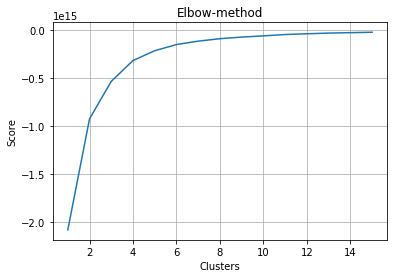

In [110]:
fig, ax = plt.subplots()
ax.plot([i+1 for i in range(k)],inertia)

ax.set(xlabel='Clusters', ylabel='Score',
       title='Elbow-method')
ax.grid()

The optimum number of clusters seems to be 4

In [111]:
dfFeClust = dfFe.dropna().copy()

In [112]:
len(dfFeClust)

12317

In [113]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(tokmean.values)
dfFeClust['Cluster'] = kmeans.labels_
kmeans.labels_

array([2, 2, 0, ..., 0, 1, 2], dtype=int32)

In [58]:
dfFeClust.head()

,Url,Price,Room,Surface,Bathroom,Floor,Cluster
0,https://www.immobiliare.it/69032803-Vendita-Bi...,169000.0,2,72.0,1,-4,2
1,https://www.immobiliare.it/69032803-Vendita-Bi...,169000.0,2,72.0,1,-4,2
2,https://www.immobiliare.it/69783036-Vendita-At...,520000.0,4,120.0,3,-1,0
3,https://www.immobiliare.it/69783036-Vendita-At...,520000.0,4,120.0,3,-1,0
4,https://www.immobiliare.it/60154116-Vendita-Mo...,195000.0,1,38.0,1,1,2


In [59]:
dimClusts = {}
for i in range(4):
    dimClusts[i] = len(dfFeClust.loc[(dfFeClust['Cluster'] == i)])
dimClusts

{0: 2788, 1: 592, 2: 8884, 3: 53}

In [116]:
kmeansD = KMeans(n_clusters=4, random_state=0).fit(adjacency.values)

NameError: name 'length' is not defined

In [117]:
len(kmeansD.labels_)

12435

In [115]:
# dfFeClust['ClusterDescr'] = kmeansD.labels_

ValueError: Length of values does not match length of index

In [494]:
import libclust
import importlib
importlib.reload(libclust)

<module 'libclust' from '/Users/fabiomontello/Google Drive/Università/LaSapienza/Corsi/AlgorithmsForDataMining/Homeworks/ADM Homework 4/libclust.py'>

In [8]:
X = tokmean.values
k = 4
selfCluster = {}
myclust = libclust.KMeans(X, k)
selfCluster = myclust.giveCluster()

NameError: name 'tokmean' is not defined

In [62]:
dimClusts = {}
for i in range(4):
    dimClusts[i] = len(selfCluster[i])
dimClusts

{0: 2787, 1: 77, 2: 8860, 3: 593}

In [63]:
np.array(myclust.giveClusterArray())

array([2, 2, 0, ..., 0, 3, 2])

In [64]:
dfFeClust['HMCluster'] = np.array(myclust.giveClusterArray())

In [65]:
dfFeClust.head()

,Url,Price,Room,Surface,Bathroom,Floor,Cluster,HMCluster
0,https://www.immobiliare.it/69032803-Vendita-Bi...,169000.0,2,72.0,1,-4,2,2
1,https://www.immobiliare.it/69032803-Vendita-Bi...,169000.0,2,72.0,1,-4,2,2
2,https://www.immobiliare.it/69783036-Vendita-At...,520000.0,4,120.0,3,-1,0,0
3,https://www.immobiliare.it/69783036-Vendita-At...,520000.0,4,120.0,3,-1,0,0
4,https://www.immobiliare.it/60154116-Vendita-Mo...,195000.0,1,38.0,1,1,2,2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [486]:
import findspark
import pyspark

In [487]:
findspark.init()
sc = pyspark.SparkContext.getOrCreate()

In [ ]:
sc

In [489]:
k = 4
X = np.random.rand(50, 2)
centroids = np.empty([k, X.shape[1]])
for t,i in enumerate(np.random.choice(X.shape[0], k, replace=False)):
    centroids[t] = X[i]

centroids

array([[0.37217979, 0.45053189],
       [0.08670491, 0.40456529],
       [0.86372268, 0.40549722],
       [0.32302665, 0.12482315]])

In [491]:
def kmeansMap(x):
    mindist = float("inf")
    mindistk = 0 
    for j in range(k):
        dist = np.linalg.norm(x-centroids[j])
        if(mindist > dist):
            mindist = dist
            mindistk = j
    
    return (mindistk, x) #(x, 1)

In [492]:
l = sc.parallelize(X)


In [493]:
for i in range(300):
    s = l.map(kmeansMap).groupByKey().mapValues(list).collect()
    
    oldcentroids = centroids.copy()
    for i,elem in enumerate(s):
        centroids[i] = np.mean(elem[1], axis=0)
        
    if(np.array_equal(centroids,oldcentroids)):
        print("Number of cycles: ",i, '\n')
        print("Clusters: ",s, '\n')
        print("Centroids: ",centroids)
        break

Number of cycles:  3 

Clusters:  [(0, [array([0.51609327, 0.83256807]), array([0.46301652, 0.85863342]), array([0.59712304, 0.91558386]), array([0.17771627, 0.98210259]), array([0.42658801, 0.82774706]), array([0.27663546, 0.94824543]), array([0.37176556, 0.6216697 ]), array([0.54331036, 0.87749135]), array([0.42937538, 0.68544032]), array([0.39056079, 0.81568356])]), (1, [array([0.07132198, 0.78520498]), array([0.30164495, 0.54136582]), array([0.10435522, 0.85298757]), array([0.08670491, 0.40456529]), array([0.07992026, 0.62467046]), array([0.03816733, 0.29905659]), array([0.02697277, 0.91954841]), array([0.05636382, 0.93454078]), array([0.08430024, 0.37712356]), array([0.12094475, 0.69749849])]), (2, [array([0.90468212, 0.53045009]), array([0.93742186, 0.75621919]), array([0.95288818, 0.8596591 ]), array([0.86372268, 0.40549722]), array([0.98261972, 0.29340919]), array([0.87059496, 0.97658908]), array([0.98136492, 0.43589646]), array([0.94529777, 0.52084462]), array([0.78569044, 0.8

False